<a href="https://colab.research.google.com/github/beyzoskaya/ClassificationCIFAR10/blob/main/decisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature extraction for comparing histograms

Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


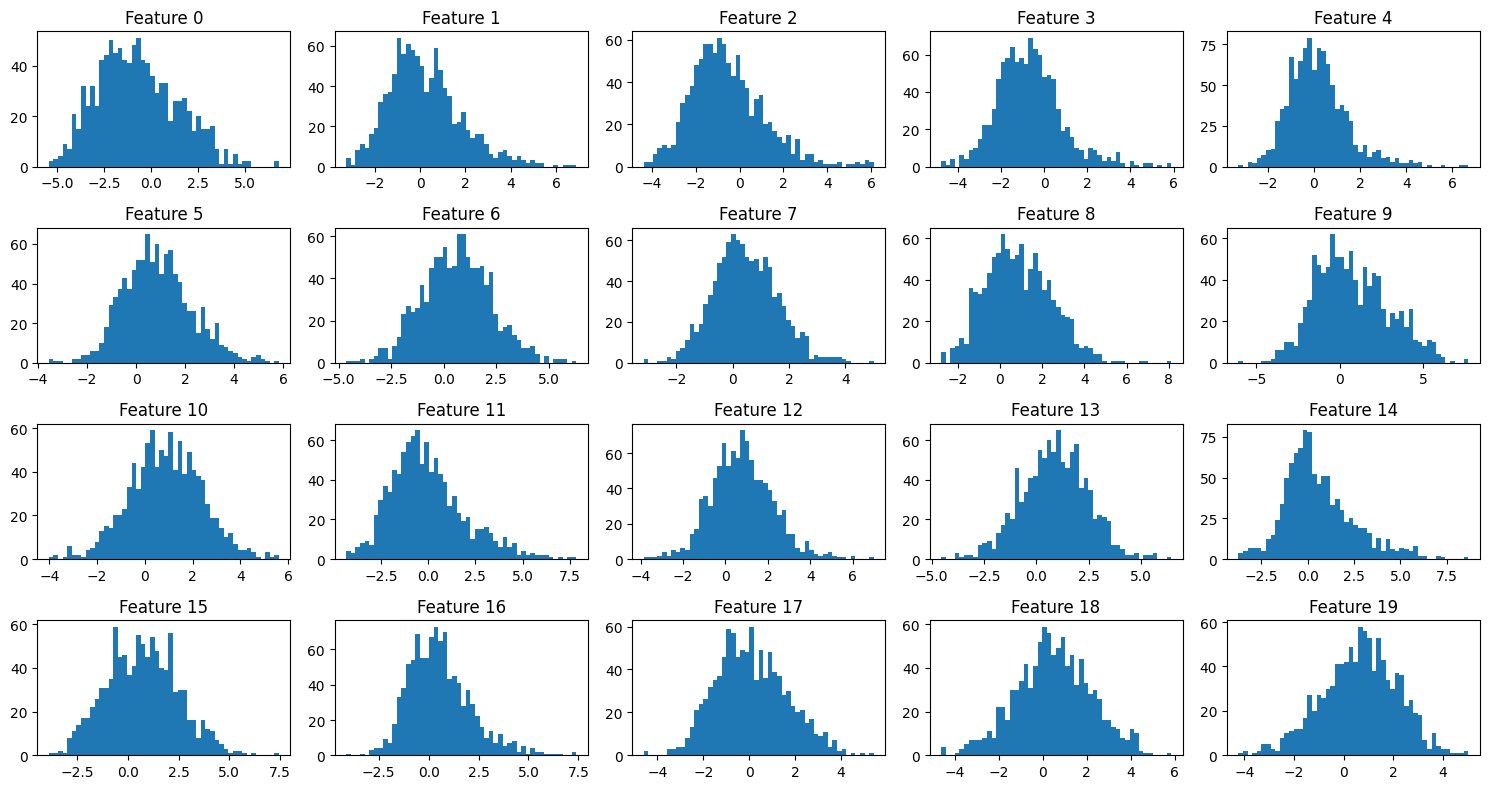

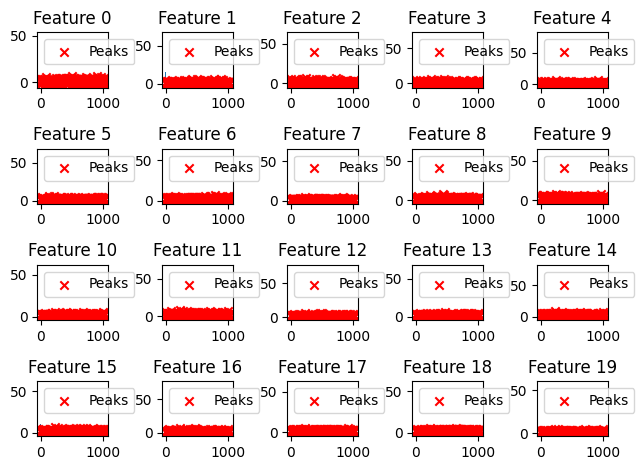

In [139]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import torch
import torchvision.models as models

from scipy.signal import find_peaks

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

cifar10_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)


resnet_model = models.resnet18(pretrained=True)
resnet_model.eval()

def extract_features(model, dataset, num_samples=1000):
    loader = DataLoader(dataset, batch_size=64, shuffle=False)
    features = []
    with torch.no_grad():
        for i, (inputs, _) in enumerate(loader):
            if i * loader.batch_size >= num_samples:
                break
            outputs = model(inputs)
            features.append(outputs.cpu().numpy())
    return np.concatenate(features)

def plot_feature_histograms(features, num_features=20, bins=50):
    """
    Plots histograms for the specified number of features.

    :param features: Numpy array of extracted features
    :param num_features: Number of features to plot histograms
    :param bins: Number of bins in the histogram
    """
    ncols = 5
    nrows = int(np.ceil(num_features / ncols))

    plt.figure(figsize=(15, 2 * nrows))
    for i in range(num_features):
        plt.subplot(nrows, ncols, i + 1)
        plt.hist(features[:, i], bins=bins)
        plt.title(f'Feature {i}')
        plt.tight_layout()
    plt.show()

extracted_features = extract_features(resnet_model, cifar10_dataset, num_samples=1000)

plot_feature_histograms(extracted_features, num_features=20, bins=50)
num_features = 20
for i in range(num_features):
    feature_values = extracted_features[:, i]

    peaks, _ = find_peaks(feature_values)

    plt.subplot(4, 5, i + 1)
    plt.hist(feature_values, bins=50)
    plt.scatter(peaks, feature_values[peaks], color='red', marker='x', label='Peaks')
    plt.title(f'Feature {i}')
    plt.legend()

plt.tight_layout()
plt.show()


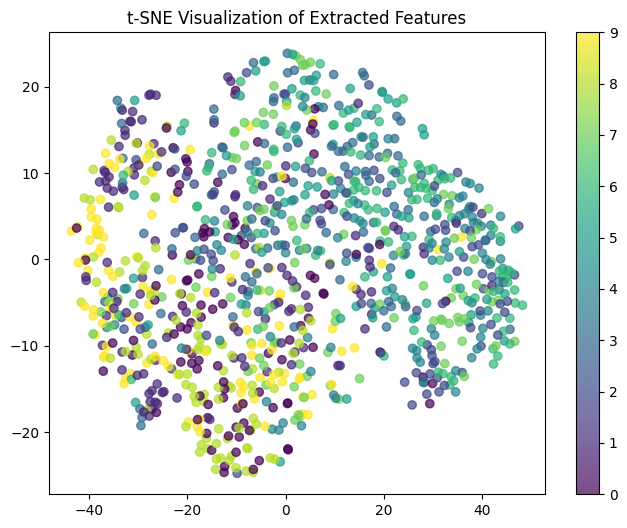

In [137]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
features_tsne = tsne.fit_transform(extracted_features)

plt.figure(figsize=(8, 6))
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=cifar10_dataset.targets[:features_tsne.shape[0]], cmap='viridis', alpha=0.7)
plt.colorbar()
plt.title('t-SNE Visualization of Extracted Features')
plt.show()

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: torch.flatten(x))
])

In [3]:
cifar10_full = torchvision.datasets.CIFAR10(root='./data', train=True, download=True,transform=transform)

100%|██████████| 170498071/170498071 [00:03<00:00, 43079487.46it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [4]:
total_size = len(cifar10_full)
total_size

50000

In [5]:
class_indices = [[] for _ in range(10)]
for i, (image,label) in enumerate(cifar10_full):
  class_indices[label].append(i)

In [6]:
from torch.utils.data import Subset
import random

train_size_per_class = 600
val_size_per_class = 200
test_size_per_class = 200

train_indices = []
val_indices = []
test_indices = []

for indices in class_indices:
  random.shuffle(indices)
  train_indices.extend(indices[:train_size_per_class])
  val_indices.extend(indices[train_size_per_class:train_size_per_class + val_size_per_class])
  test_indices.extend(indices[train_size_per_class + val_size_per_class:train_size_per_class + val_size_per_class + test_size_per_class])

cifar10_train = Subset(cifar10_full, train_indices)
cifar10_val = Subset(cifar10_full, val_indices)
cifar10_test = Subset(cifar10_full, test_indices)

In [7]:
len(cifar10_train), len(cifar10_val), len(cifar10_test)

(6000, 2000, 2000)

In [8]:
from collections import Counter
def count_images_per_class(dataset):
  return Counter(sample[1] for sample in dataset)

images_per_class_train = count_images_per_class(cifar10_train)
images_per_class_val = count_images_per_class(cifar10_val)
images_per_class_test = count_images_per_class(cifar10_test)

print("Number of images per class in the train set:")
for class_label, count in images_per_class_train.items():
    print(f"Class {class_label}: {count} images")

print("\nNumber of images per class in the validation set:")
for class_label, count in images_per_class_val.items():
    print(f"Class {class_label}: {count} images")

print("\nNumber of images per class in the test set:")
for class_label, count in images_per_class_test.items():
    print(f"Class {class_label}: {count} images")

Number of images per class in the train set:
Class 0: 600 images
Class 1: 600 images
Class 2: 600 images
Class 3: 600 images
Class 4: 600 images
Class 5: 600 images
Class 6: 600 images
Class 7: 600 images
Class 8: 600 images
Class 9: 600 images

Number of images per class in the validation set:
Class 0: 200 images
Class 1: 200 images
Class 2: 200 images
Class 3: 200 images
Class 4: 200 images
Class 5: 200 images
Class 6: 200 images
Class 7: 200 images
Class 8: 200 images
Class 9: 200 images

Number of images per class in the test set:
Class 0: 200 images
Class 1: 200 images
Class 2: 200 images
Class 3: 200 images
Class 4: 200 images
Class 5: 200 images
Class 6: 200 images
Class 7: 200 images
Class 8: 200 images
Class 9: 200 images


In [9]:
import matplotlib.pyplot as plt
import numpy as np

def show_images(dataset, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))

    random_indices = np.random.choice(len(dataset), num_images, replace=False)

    for i, idx in enumerate(random_indices):
        image, label = dataset[idx]


        image = image.view(3, 32, 32).numpy()
        image = np.transpose(image, (1, 2, 0))

        image = (image - image.min()) / (image.max() - image.min())

        axes[i].imshow(image)
        axes[i].set_title(f"Class: {label}")
        axes[i].axis('off')

    plt.show()


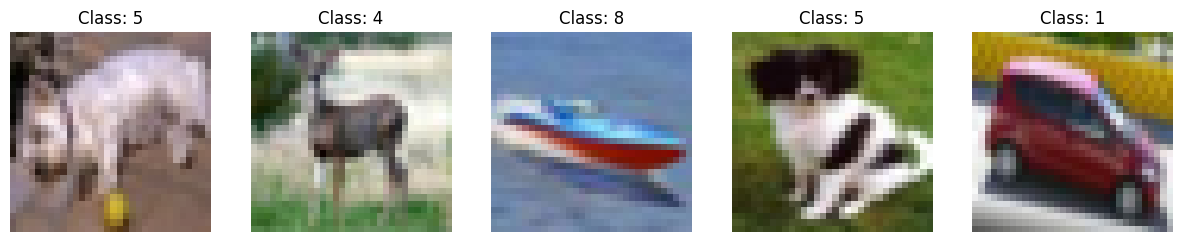

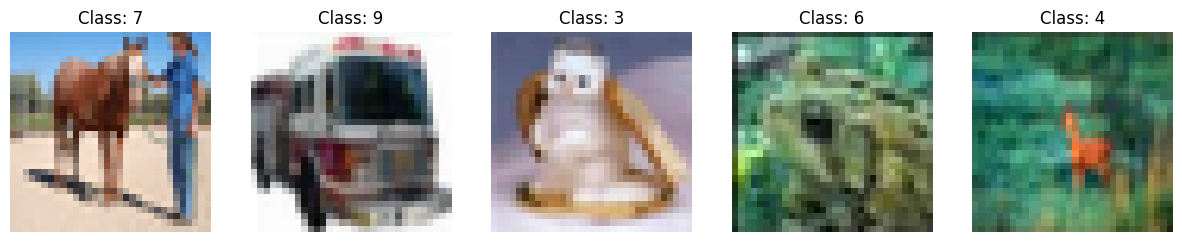

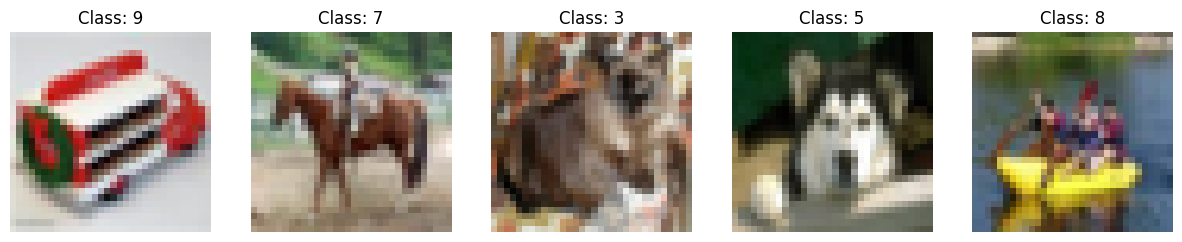

In [10]:
show_images(cifar10_train)
show_images(cifar10_val)
show_images(cifar10_test)

In [11]:
class_names = cifar10_full.classes
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [12]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [13]:
def dataset_to_numpy(dataset):
    X, y = [], []
    for image, label in dataset:
        X.append(image.numpy())
        y.append(label)
    return np.array(X), np.array(y)

In [14]:
X_train, y_train = dataset_to_numpy(cifar10_train)
X_val, y_val = dataset_to_numpy(cifar10_val)
X_test, y_test = dataset_to_numpy(cifar10_test)

In [34]:
print(f"Shape of X_train: {X_train.shape} and Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape} and Shape of y_val: {y_val.shape}")
print(f"Shape of X_test: {X_test.shape} and Shape of y_test: {y_test.shape}")

Shape of X_train: (6000, 3072) and Shape of y_train: (6000,)
Shape of X_val: (2000, 3072) and Shape of y_val: (2000,)
Shape of X_test: (2000, 3072) and Shape of y_test: (2000,)


In [56]:
print("Datatype of X_train:", X_train.dtype)
print("Datatype of y_train:", y_train.dtype)
print("Datatype of X_val:", X_val.dtype)
print("Datatype of y_val:", y_val.dtype)
print("Datatype of X_test:", X_test.dtype)
print("Datatype of y_test:", y_test.dtype)

Datatype of X_train: float32
Datatype of y_train: int64
Datatype of X_val: float32
Datatype of y_val: int64
Datatype of X_test: float32
Datatype of y_test: int64


In [15]:
tree_classifier = tree.DecisionTreeClassifier(max_depth=15)
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15)

In [35]:
tree_classifier = DecisionTreeClassifier(max_depth=15)
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15)

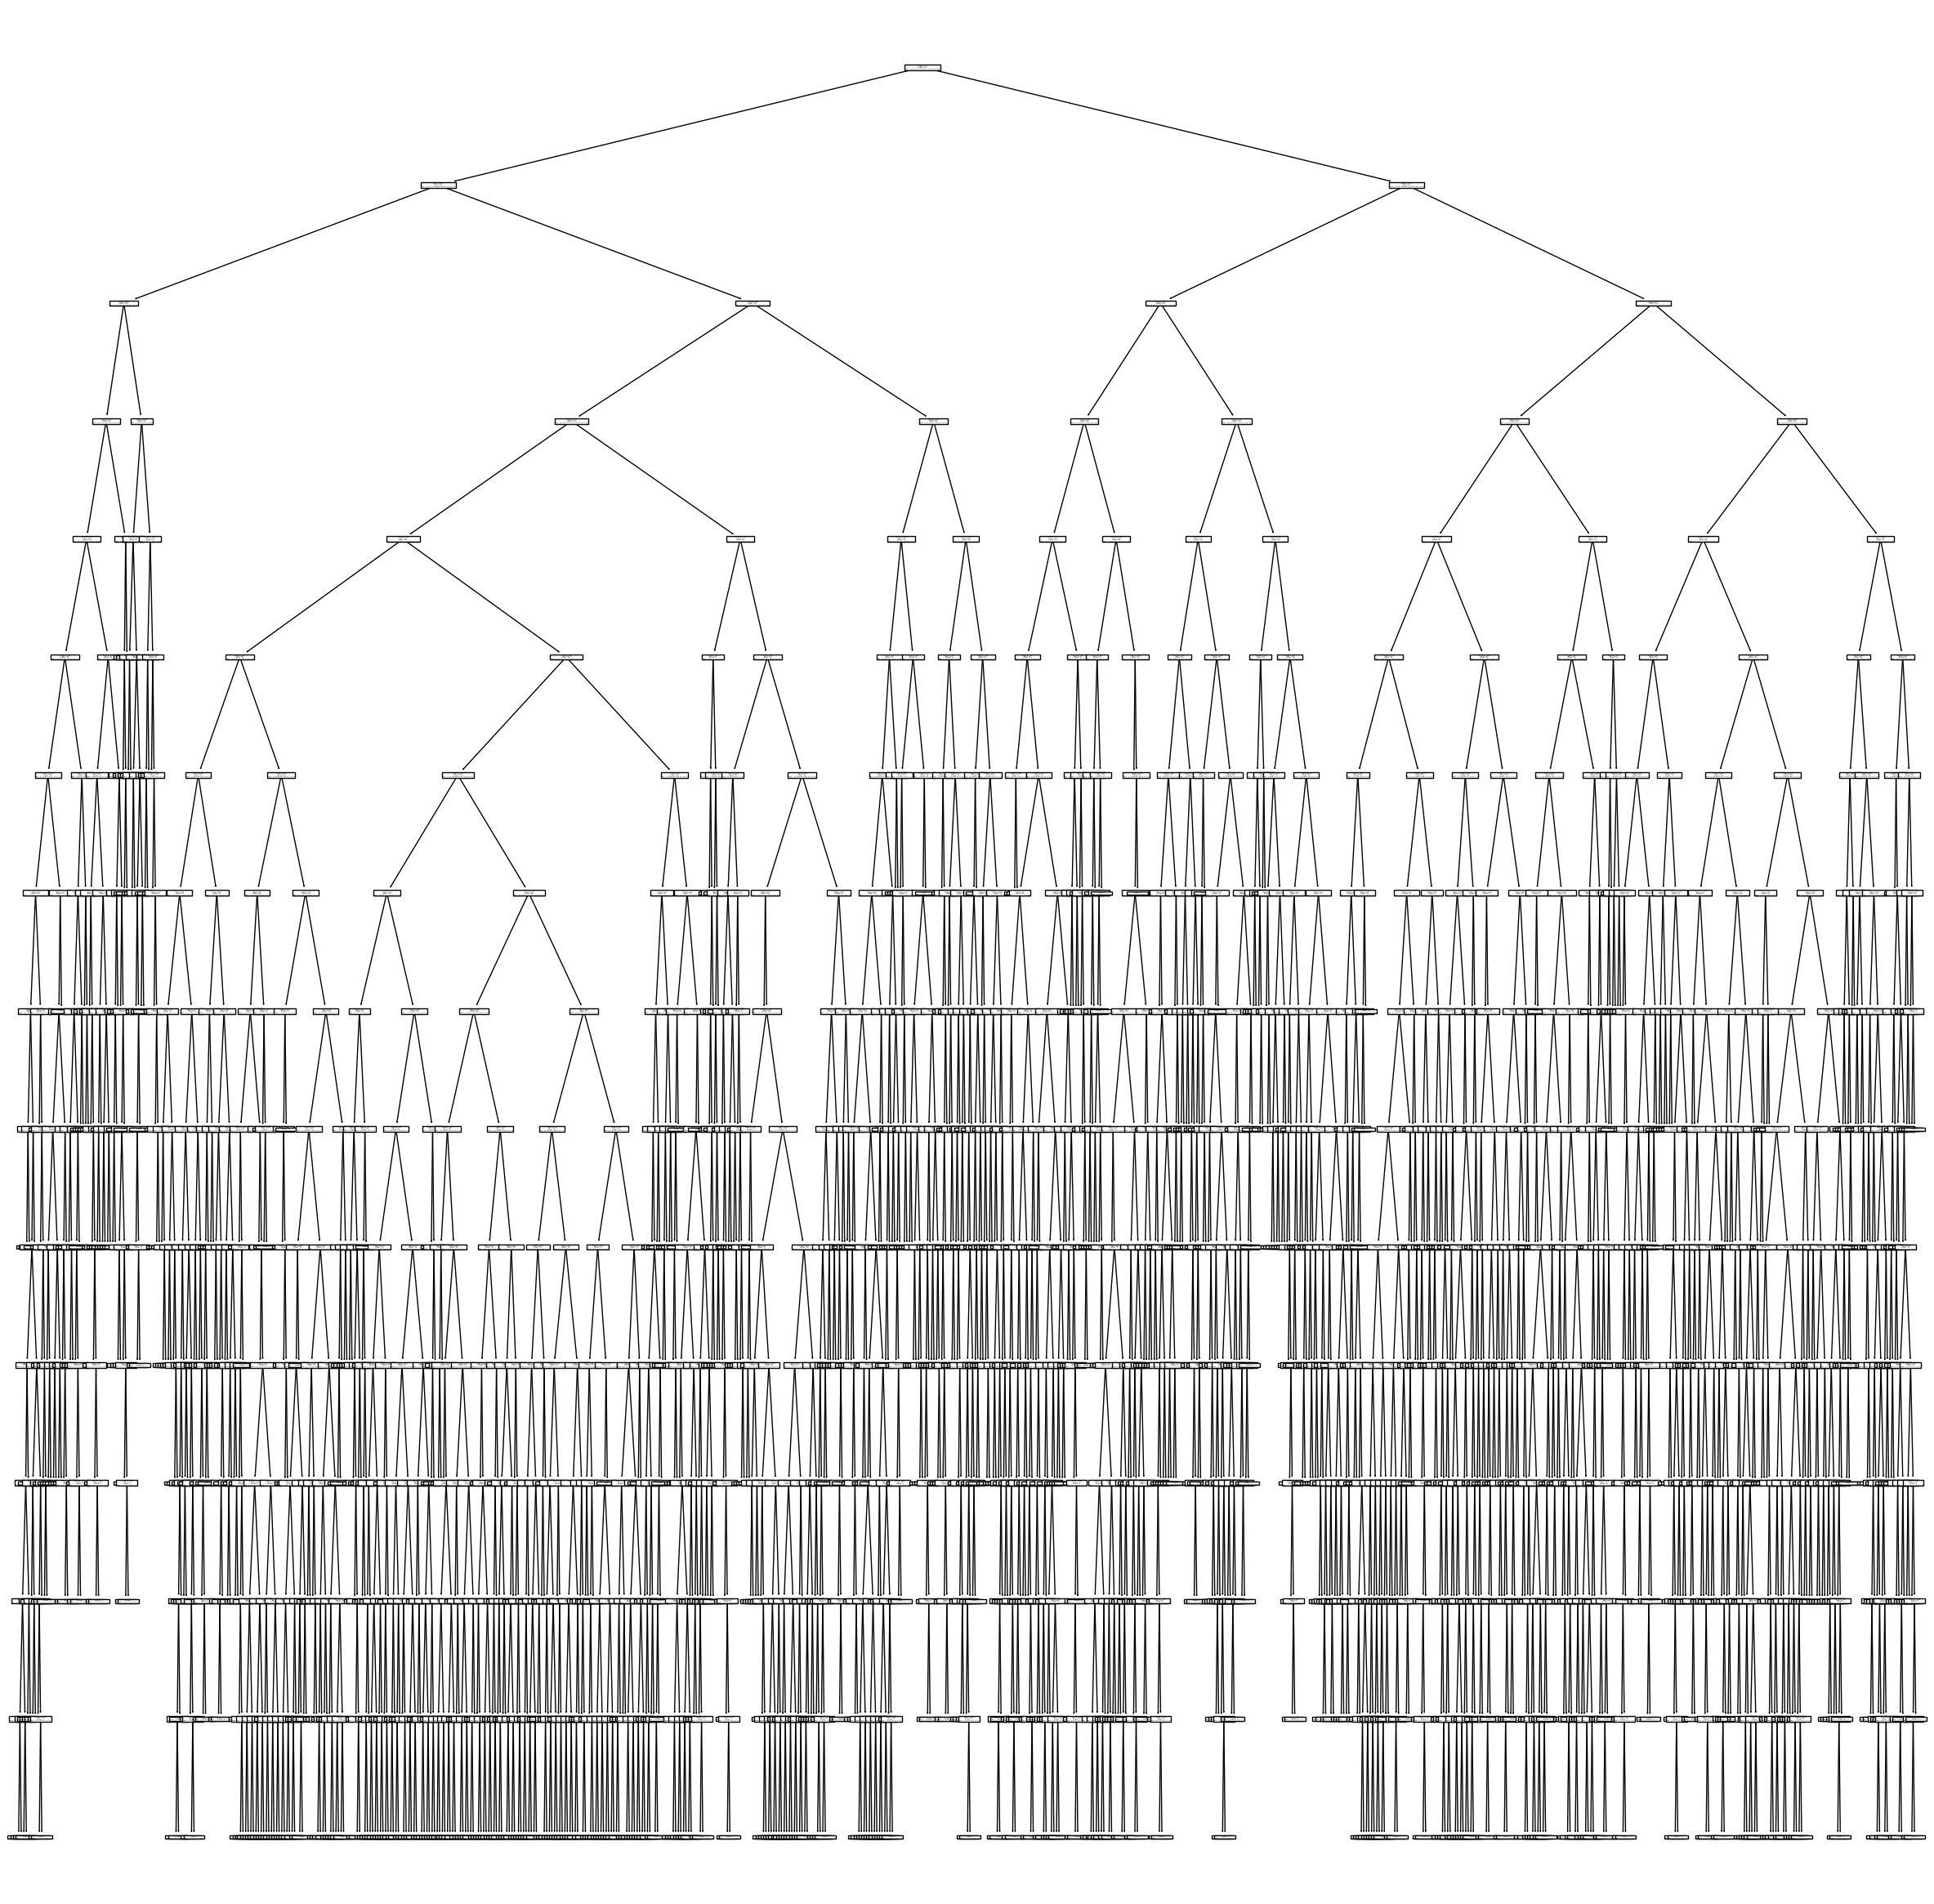

In [36]:
plt.figure(figsize=(30, 30))
tree.plot_tree(tree_classifier)
plt.show()

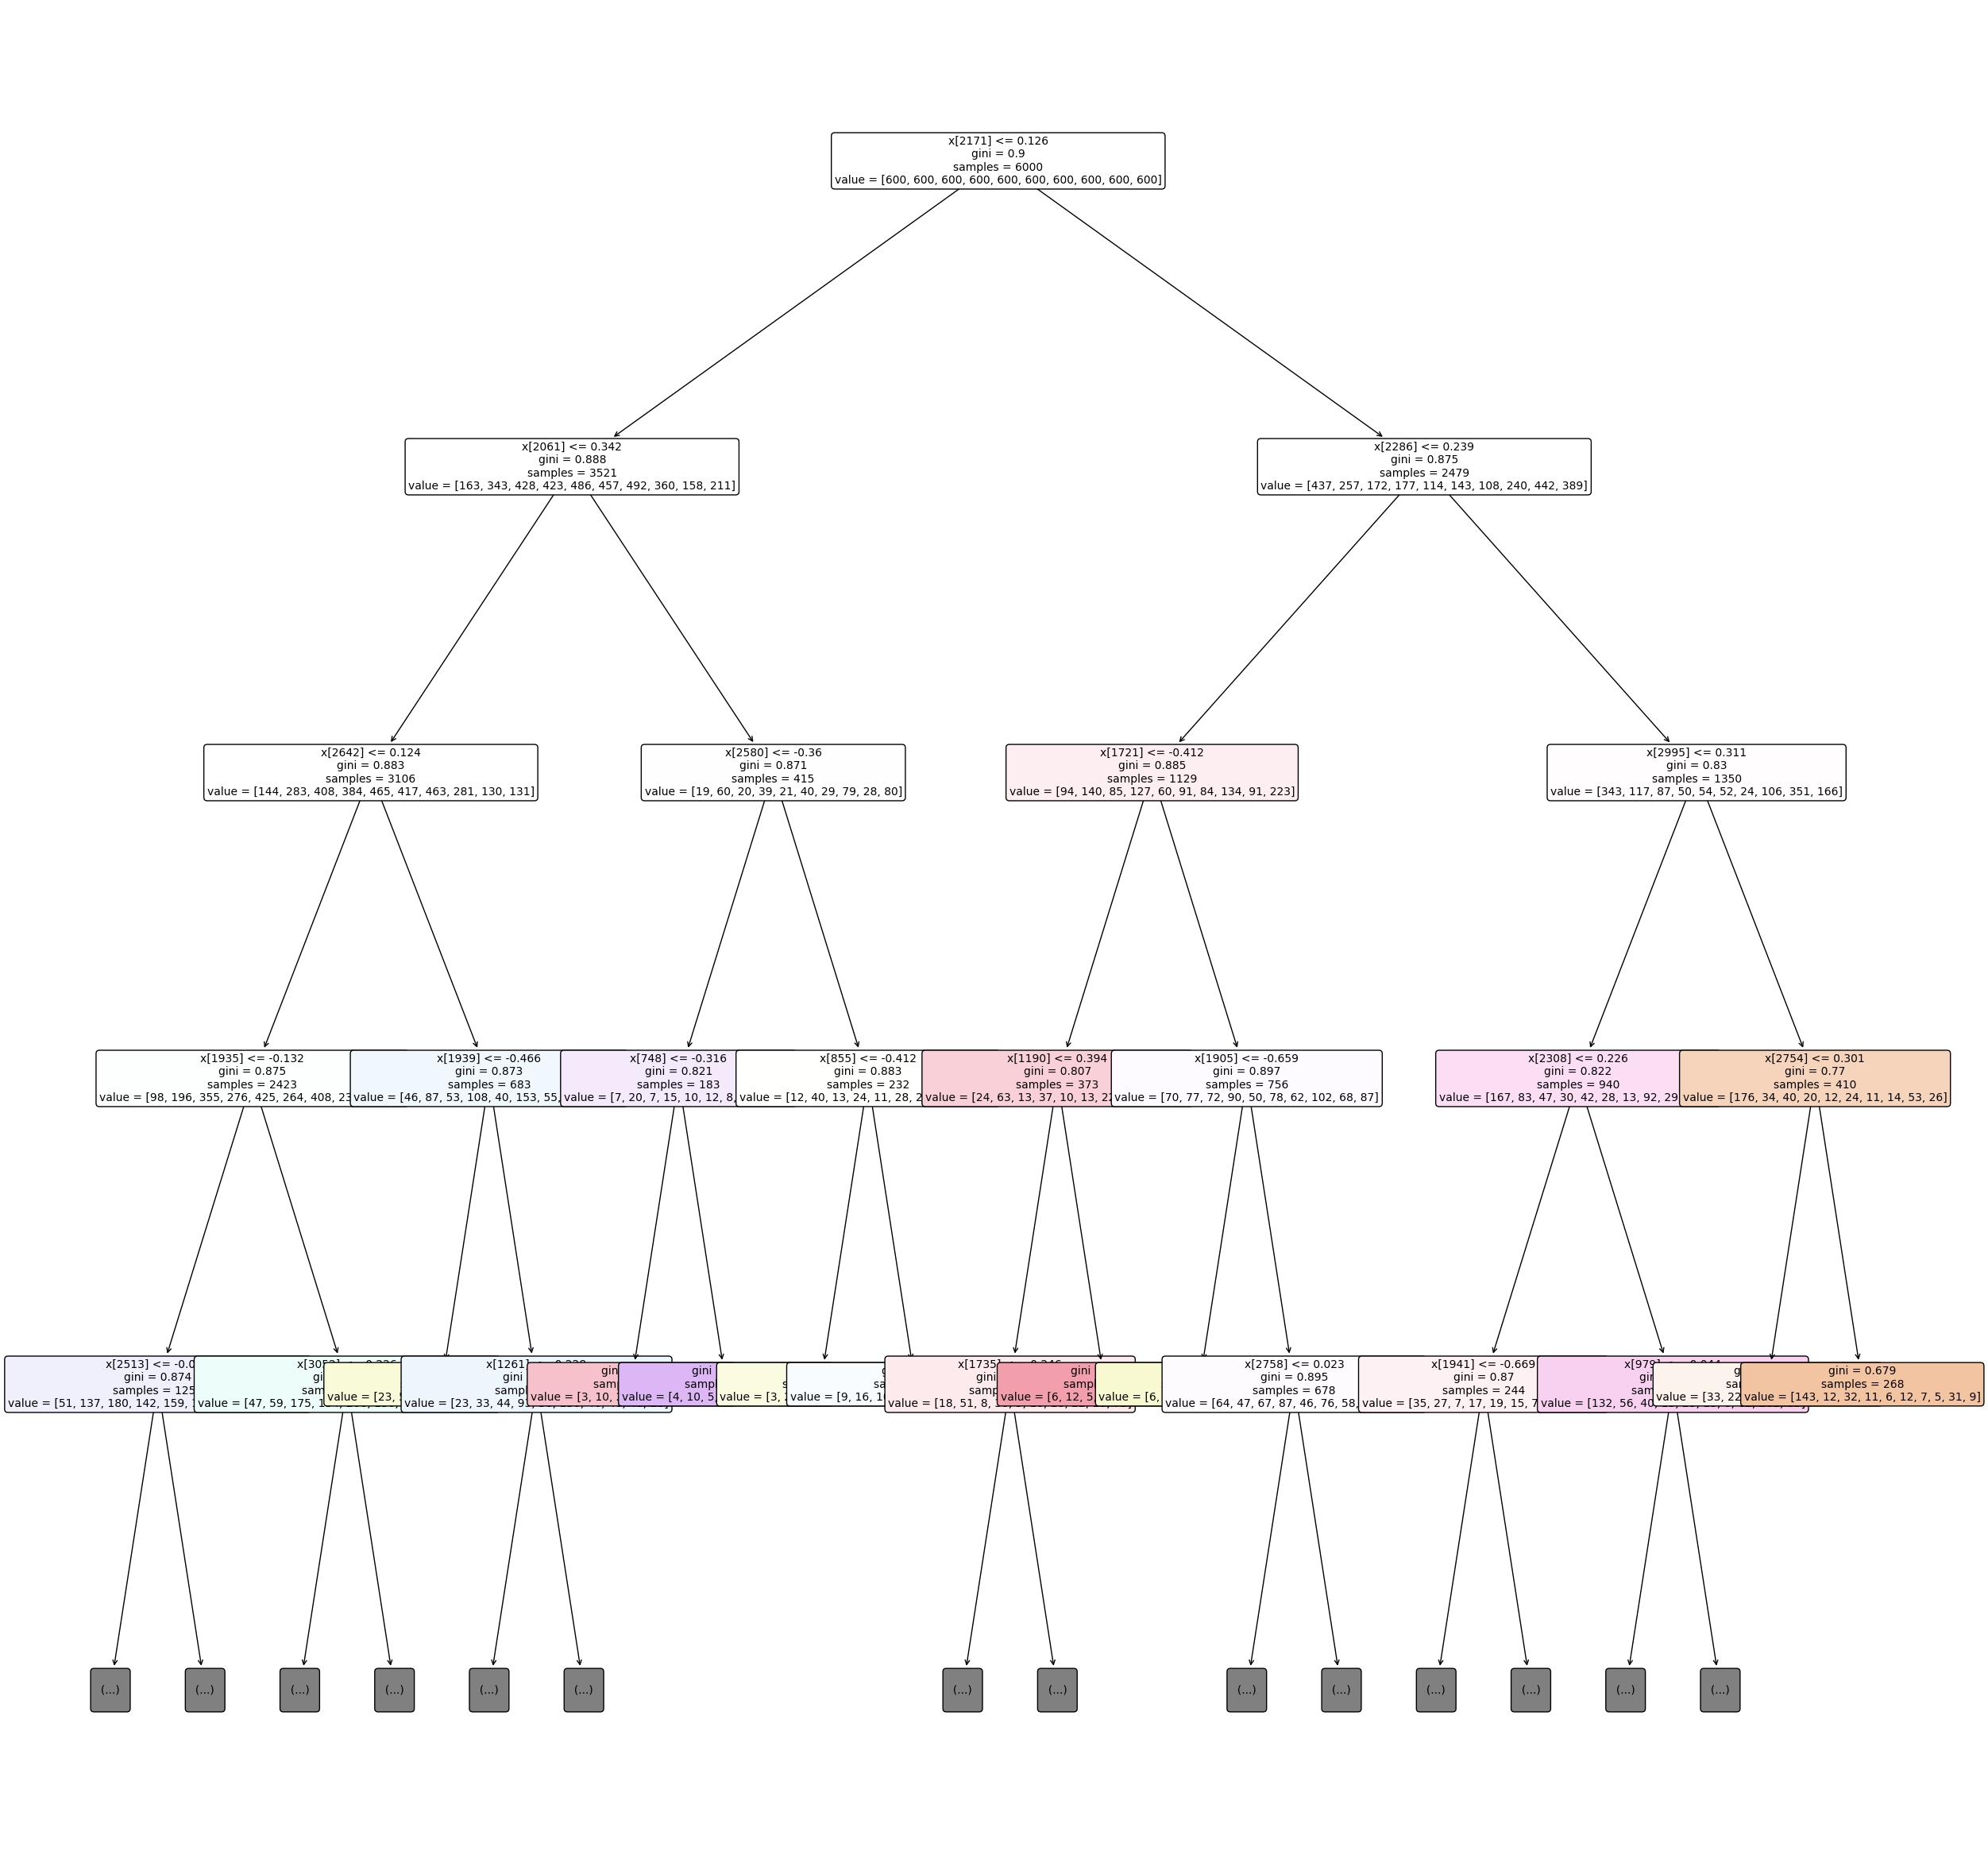

In [77]:
plt.figure(figsize=(30, 30))

tree.plot_tree(tree_classifier, filled=True, rounded=True, max_depth=4, fontsize=10)

plt.show()

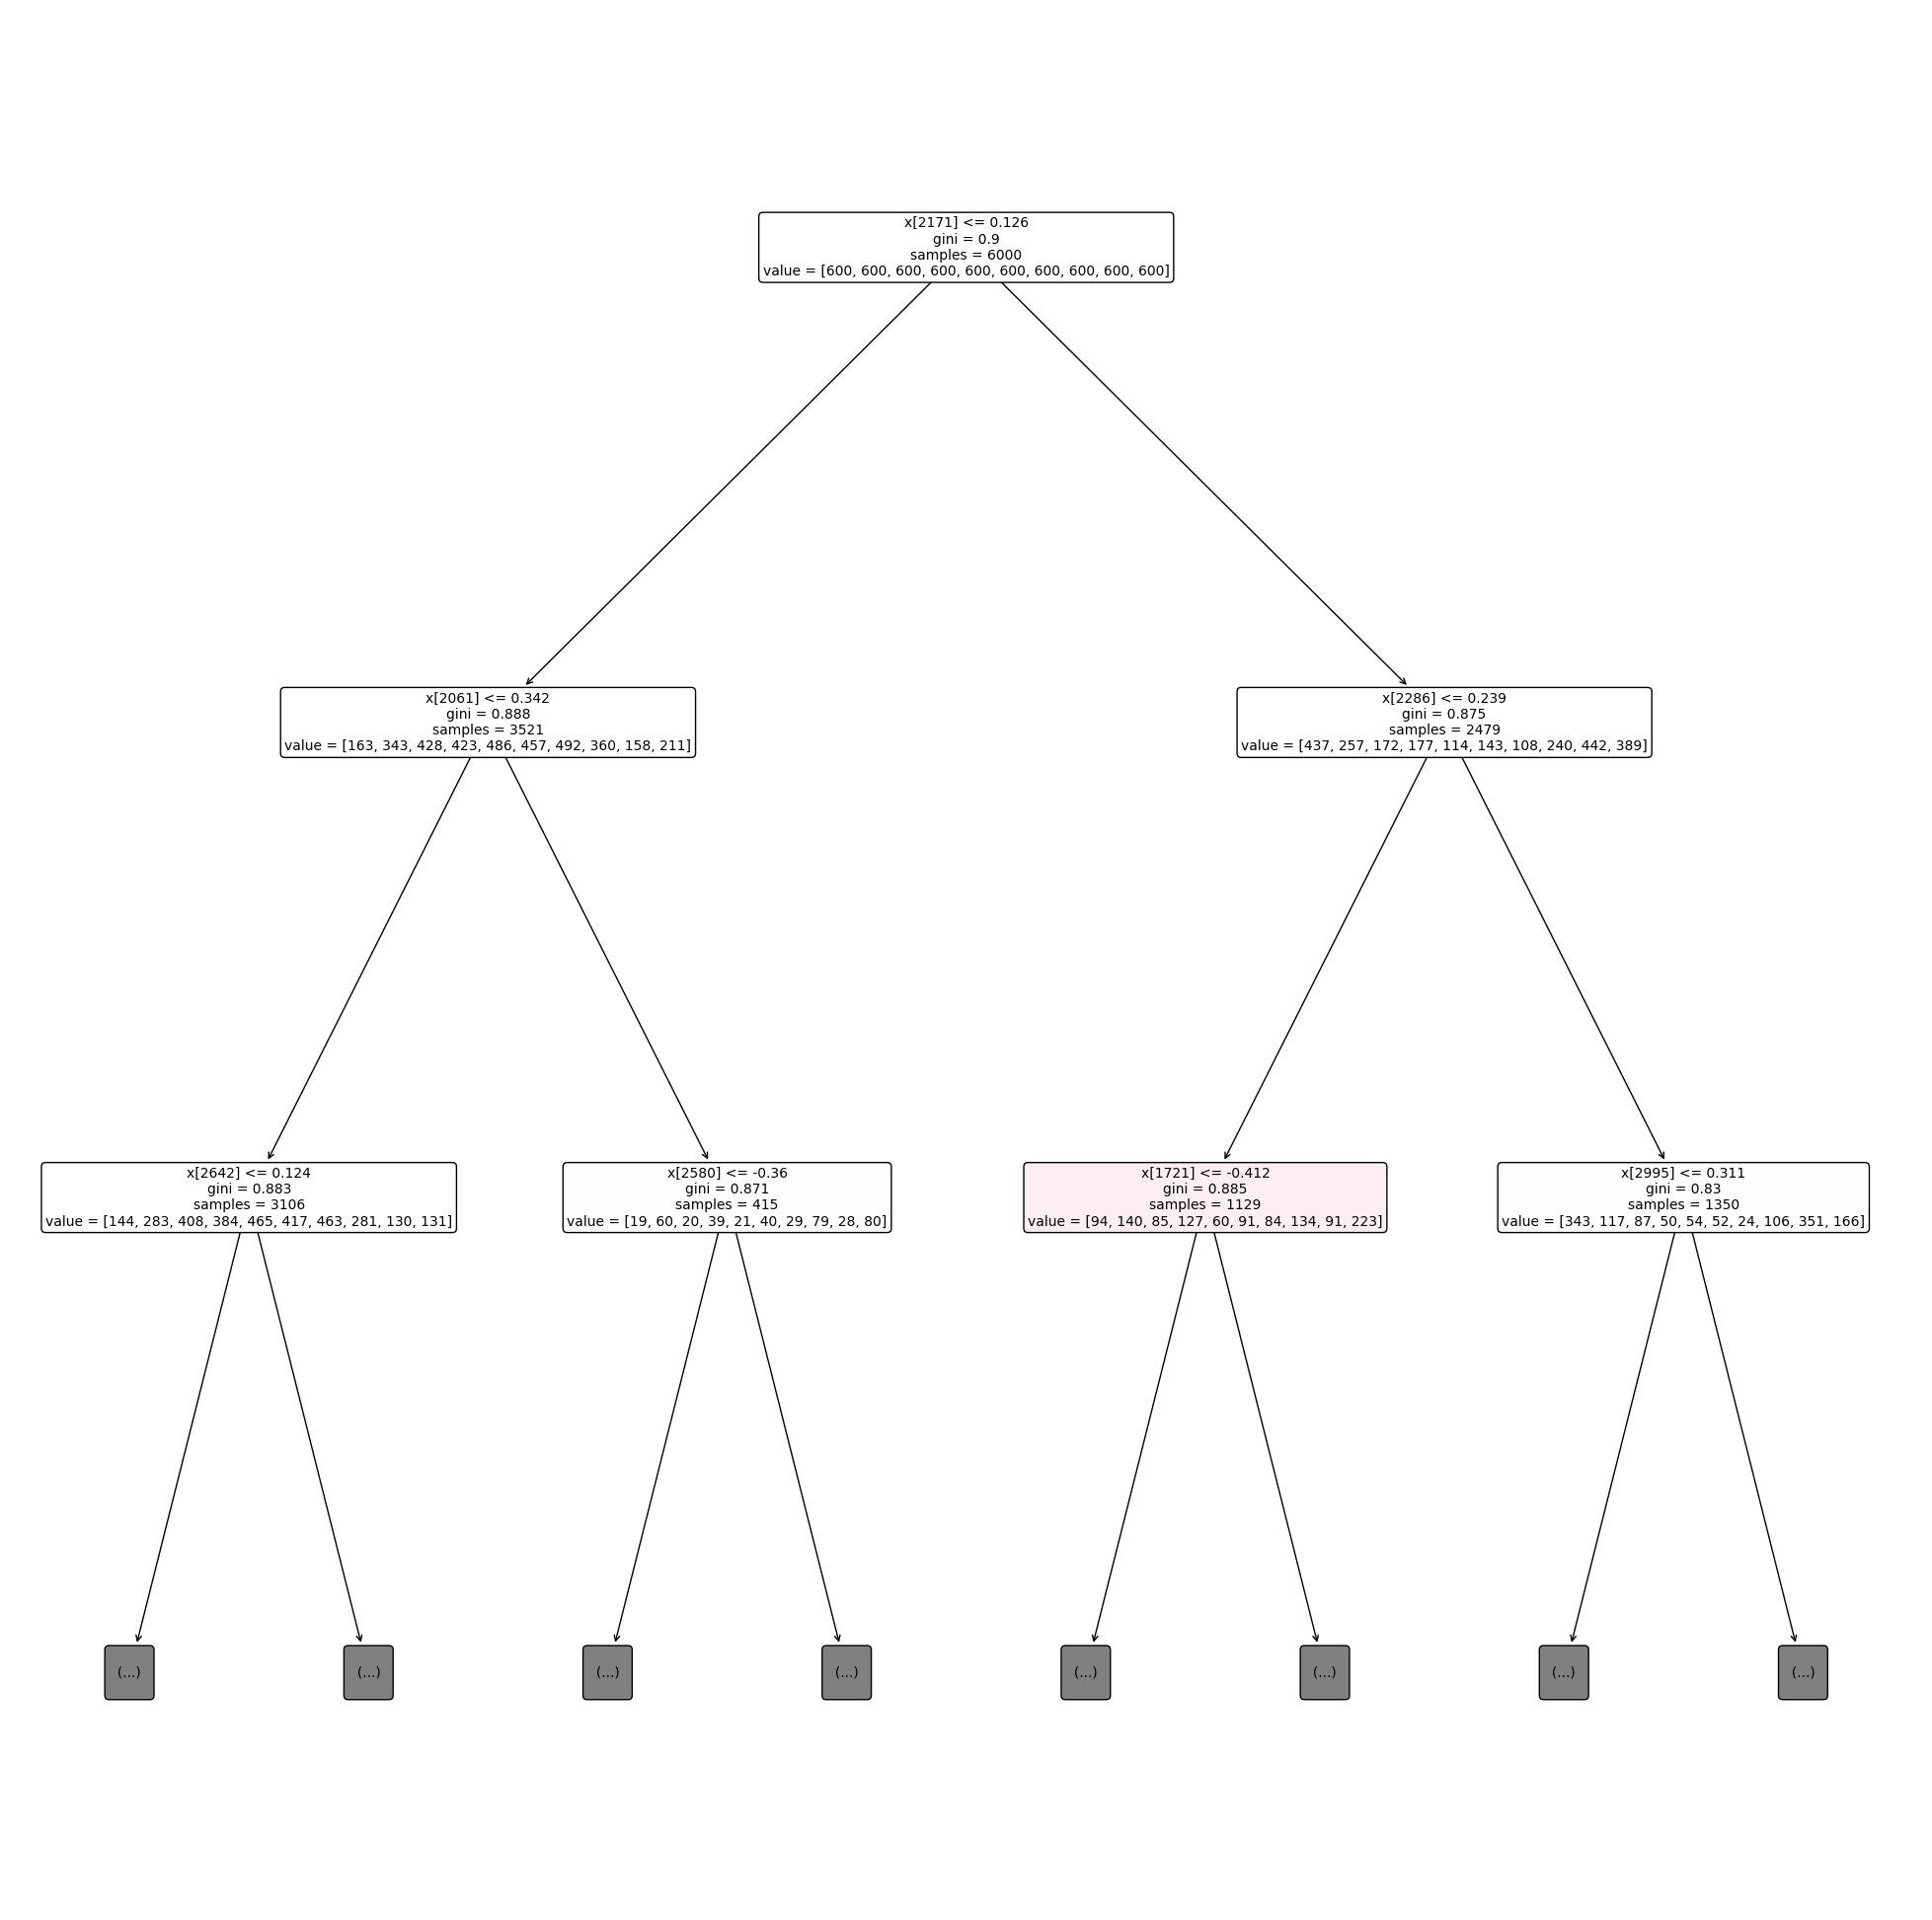

In [80]:
plt.figure(figsize=(25, 25))
tree.plot_tree(tree_classifier, filled=True,rounded=True, max_depth=2, fontsize=10)
plt.show()

In [37]:
y_pred_train = tree_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f'Training Accuracy: {train_accuracy:.2f}')

Training Accuracy: 0.89


In [38]:
y_pred_val = tree_classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print(f'Validation Accuracy: {val_accuracy:.2f}')

Validation Accuracy: 0.22


In [39]:
y_pred_test = tree_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

Test Accuracy: 0.23


In [40]:
misclassification_rate = 1 - test_accuracy
print(f'Misclassification Rate (Test): {misclassification_rate:.2f}')

Misclassification Rate (Test): 0.77


In [41]:
import matplotlib.pyplot as plt
import numpy as np

def featureImportance(model, num_features=20):
    """
    Plots the feature importances of a trained decision tree model.

    :param model: The trained decision tree model.
    :param num_features: Number of top features to display.
    """
    importances = model.feature_importances_

    indices = np.argsort(importances)[::-1]

    top_indices = indices[:num_features]
    sorted_importances = importances[top_indices]

    plt.figure(figsize=(12, 6))
    plt.title("Top Feature Importances in Decision Tree Classifier")
    plt.bar(range(num_features), sorted_importances, align="center")
    plt.xticks(range(num_features), top_indices, rotation=45)
    plt.xlabel("Feature Index")
    plt.ylabel("Importance")
    plt.show()


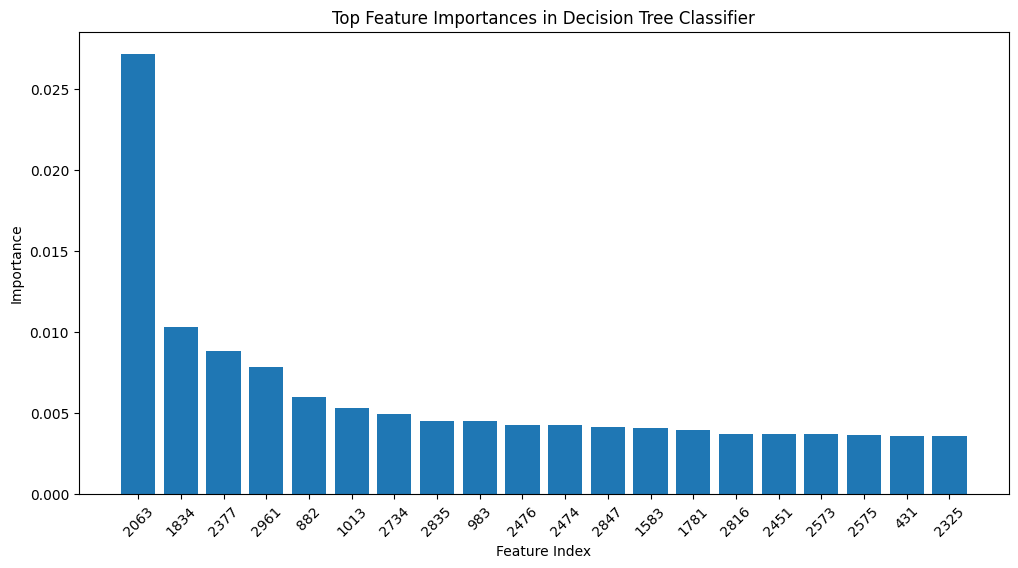

In [42]:
featureImportance(tree_classifier, num_features=20)

Confussion Matrix representation for Decision Tree

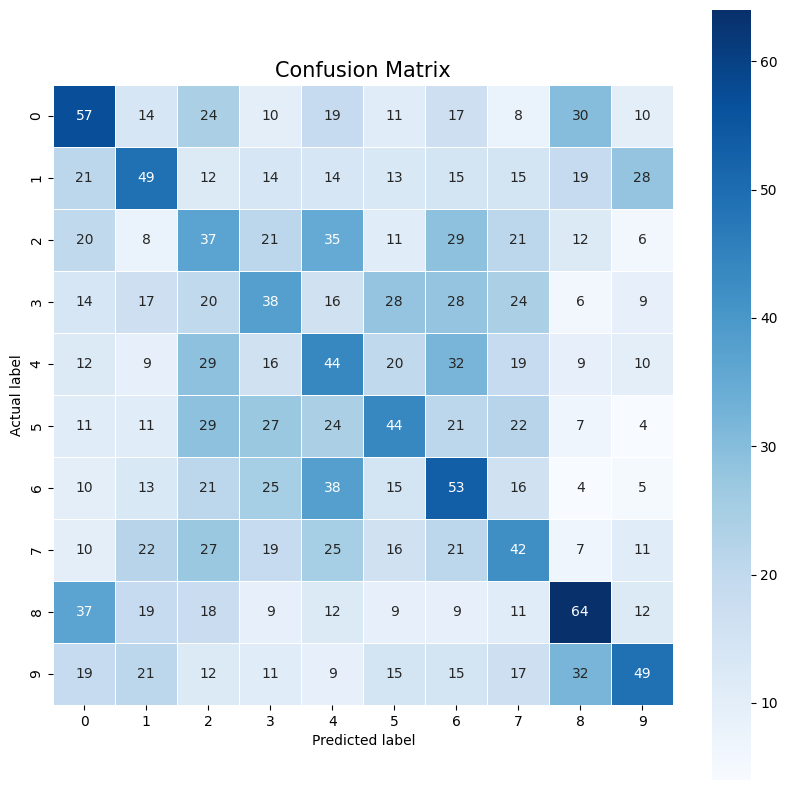

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


y_pred_test = tree_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', size = 15)
plt.show()

In [22]:
from sklearn.metrics import precision_score, recall_score

y_pred_test = tree_classifier.predict(X_test)

precision = precision_score(y_test, y_pred_test, average='macro')
print(f'Precision: {precision:.2f}')

recall = recall_score(y_test, y_pred_test, average='macro')
print(f'Recall: {recall:.2f}')


Precision: 0.24
Recall: 0.24


In [23]:
from sklearn.metrics import confusion_matrix

def calculate_precision_recall(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    precision = np.diag(cm) / np.sum(cm, axis=0)
    recall = np.diag(cm) / np.sum(cm, axis=1)
    return precision, recall

def calculate_f1_score(y_true, y_pred):
    precision, recall = calculate_precision_recall(y_true, y_pred)
    f1_scores = 2 * (precision * recall) / (precision + recall)
    f1_scores = np.nan_to_num(f1_scores)
    average_f1_score = np.mean(f1_scores)
    return average_f1_score

y_pred_test = tree_classifier.predict(X_test)
f1_score = calculate_f1_score(y_test, y_pred_test)
print(f'Custom F1 Score: {f1_score:.2f}')


Custom F1 Score: 0.24


In [26]:
from sklearn.metrics import f1_score
y_pred_test = tree_classifier.predict(X_test)
f1 = f1_score(y_test, y_pred_test, average='macro')
print(f'F1 Score: {f1:.2f}')

F1 Score: 0.24


Decision Tree Classifier With Regularization to Compare

In [46]:
tree_classifier = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    max_features='sqrt',
    max_leaf_nodes=30
)
tree_classifier.fit(X_train, y_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f'Training Accuracy: {train_accuracy:.2f}')

Training Accuracy: 0.89


In [47]:
y_pred_val = tree_classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print(f'Validation Accuracy: {val_accuracy:.2f}')

Validation Accuracy: 0.24


In [48]:
y_pred_test = tree_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

Test Accuracy: 0.25


Data Augmentation Added to transform for comparison

In [116]:
from torchvision import transforms
import torchvision

data_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


cifar10_full = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=data_transform)
class_indices = [[] for _ in range(10)]
for i, (image, label) in enumerate(cifar10_full):
    class_indices[label].append(i)

train_size_per_class = 600
val_size_per_class = 200
test_size_per_class = 200

train_indices = []
val_indices = []
test_indices = []

for indices in class_indices:
    train_indices.extend(indices[:train_size_per_class])
    val_indices.extend(indices[train_size_per_class:train_size_per_class + val_size_per_class])
    test_indices.extend(indices[train_size_per_class + val_size_per_class:train_size_per_class + val_size_per_class + test_size_per_class])

cifar10_train = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=data_transform)
cifar10_val = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=test_transform)
cifar10_test = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)

cifar10_train = torch.utils.data.Subset(cifar10_train, train_indices)
cifar10_val = torch.utils.data.Subset(cifar10_val, val_indices)
cifar10_test = torch.utils.data.Subset(cifar10_test, test_indices)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [117]:
def dataset_to_numpy_flatten(dataset):
    X, y = [], []
    for image, label in dataset:
        X.append(image.numpy().flatten())
        y.append(label)
    return np.array(X), np.array(y)

In [118]:
X_train, y_train = dataset_to_numpy_flatten(cifar10_train)
X_val, y_val = dataset_to_numpy_flatten(cifar10_val)
X_test, y_test = dataset_to_numpy_flatten(cifar10_test)

In [119]:
print(f"Shape for X_train: {X_train.shape} and Shape for y_train: {y_train.shape}")
print(f"Shape for X_val: {X_val.shape} and Shape for y_val: {y_val.shape}")
print(f"Shape for X_test: {X_test.shape} and Shape for y_test: {y_test.shape}")

Shape for X_train: (6000, 3072) and Shape for y_train: (6000,)
Shape for X_val: (2000, 3072) and Shape for y_val: (2000,)
Shape for X_test: (374, 3072) and Shape for y_test: (374,)


In [134]:
tree_classifier = DecisionTreeClassifier(
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=5,
    max_features='sqrt',
    max_leaf_nodes=30
)
tree_classifier.fit(X_train, y_train)
y_pred_train = tree_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f'Training Accuracy: {train_accuracy:.2f}')

Training Accuracy: 0.29


In [135]:
y_pred_val = tree_classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print(f'Validation Accuracy: {val_accuracy:.2f}')

Validation Accuracy: 0.27


In [136]:
y_pred_test = tree_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

Test Accuracy: 0.23


Tried for Random Forest for comparison

In [19]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
forest_model.fit(X_train, y_train)
y_pred_val = forest_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
y_pred_test = forest_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Random Forest Validation Accuracy: {val_accuracy:.2f}")
print(f"Random Forest Test Accuracy: {test_accuracy:.2f}")


Random Forest Validation Accuracy: 0.39
Random Forest Test Accuracy: 0.39


In [31]:
from sklearn.metrics import roc_curve, auc
import numpy as np

def calculate_roc_auc(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    return roc_auc

Tried with PCA implementation of Decision Tree

In [30]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

n_components = 100

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

tree_classifier = DecisionTreeClassifier(max_depth=15)
tree_classifier.fit(X_train_pca, y_train)

y_pred_val = tree_classifier.predict(X_val_pca)
val_accuracy = accuracy_score(y_val, y_pred_val)
print(f'Validation Accuracy after PCA: {val_accuracy:.2f}')

y_pred_test = tree_classifier.predict(X_test_pca)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Test Accuracy after PCA: {test_accuracy:.2f}')


Validation Accuracy after PCA: 0.24
Test Accuracy after PCA: 0.22


Tried with PCA implementation of Random Forest

In [21]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

n_components = 50

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

forest_model = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
forest_model.fit(X_train, y_train)
val_accuracy = accuracy_score(y_val, y_pred_val)
y_pred_test = forest_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Random Forest PCA Validation Accuracy: {val_accuracy:.2f}")
print(f"Random Forest PCA Test Accuracy: {test_accuracy:.2f}")


Random Forest PCA Validation Accuracy: 0.23
Random Forest PCA Test Accuracy: 0.40


Class DecisionTree -Tried-

In [22]:
from torch.utils.data import DataLoader
BATCH_SIZE = 8

train_dataloader = DataLoader(cifar10_train,
                              batch_size=BATCH_SIZE,
                              num_workers=2,
                              shuffle=True)
val_dataloader = DataLoader(cifar10_val,
                            batch_size=BATCH_SIZE,
                            num_workers=2,
                            shuffle=False)

test_dataloader = DataLoader(cifar10_test,
                            batch_size=BATCH_SIZE,
                            num_workers=2,
                            shuffle=False)

In [61]:
import torch
from collections import Counter

class DecisionTree:
    def __init__(self, num_classes, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.classes = torch.arange(num_classes)
        self.tree = None

    def fit(self, X, y, depth=0):
      y = torch.tensor(y) if not isinstance(y, torch.Tensor) else y
      if depth == 0:
          self.classes = torch.unique(y)
          print(f"Classes: {self.classes}")

      self.unique_classes, self.counts = torch.unique(y, return_counts=True)
      print(f"Unique classes inside fit function: {self.unique_classes}, counts inside fit function: {self.counts}")

      if len(self.unique_classes) == 1:
          print("Is unique class 1?")
          return {'class': self.unique_classes.item()}

      if self.max_depth is not None and depth == self.max_depth:
          majority_class = self.get_majority_class()
          return {'class': majority_class}

      if len(X) <= self.min_samples_split:
          majority_class = self.get_majority_class()
          return {'class': majority_class}

      best_split = self.find_best_split(X, y)
      if best_split is None:
          majority_class = self.get_majority_class()
          return {'class': majority_class}

      feature_index, threshold = best_split
      left_mask = X[:, feature_index] <= threshold

      left_tree = self.fit(X[left_mask], y[left_mask], depth + 1)
      right_tree = self.fit(X[~left_mask], y[~left_mask], depth + 1)

      return {'feature_index': feature_index,
              'threshold': threshold,
              'left': left_tree,
              'right': right_tree}

    def find_best_split(self, X, y):
        best_gini = float('inf')
        best_split = None

        for feature_index in range(X.shape[1]):
            thresholds = torch.unique(X[:, feature_index])
            for threshold in thresholds:
                mask = X[:, feature_index] <= threshold
                gini = self.calculate_gini_index(y, mask)

                if gini < best_gini:
                    best_gini = gini
                    best_split = (feature_index, threshold.item())

        return best_split

    def calculate_gini_index(self, y, mask):
        total_samples = len(y)
        left_size = torch.sum(mask).item()
        right_size = total_samples - left_size

        if left_size == 0 or right_size == 0:
            return 0.0

        left_gini = 1.0 - torch.sum(torch.tensor([(torch.sum(mask & (y == c)).item() / left_size) ** 2 for c in self.classes]))
        right_gini = 1.0 - torch.sum(torch.tensor([(torch.sum(~mask & (y == c)).item() / right_size) ** 2 for c in self.classes]))


        gini_index = (left_size / total_samples) * left_gini + (right_size / total_samples) * right_gini

        return gini_index

    def get_majority_class(self):
        majority_class_index = torch.argmax(self.counts)
        majority_class = self.unique_classes[majority_class_index].item()
        return majority_class

    def predict(self, X):
        predictions = torch.zeros(X.shape[0])

        for i in range(X.shape[0]):
            predictions[i] = self.predict_single(X[i])

        return predictions

    def predict_single(self, x, tree=None):
        if tree is None:
            tree = self.tree

        if 'class' in tree:
            return tree['class']
        else:
            if x[tree['feature_index']] <= tree['threshold']:
                return self.predict_single(x, tree['left'])
            else:
                return self.predict_single(x, tree['right'])

    def accuracy(self, X, y):
        predictions = self.predict(X)
        return torch.sum(predictions == y).item() / len(y)

In [51]:
X_train, y_train = next(iter(train_dataloader))
X_val, y_val = next(iter(val_dataloader))

In [62]:
decision_tree = DecisionTree(num_classes=10,max_depth=5, min_samples_split=5)
decision_tree.tree = decision_tree.fit(X_train, y_train)

Classes: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Unique classes inside fit function: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), counts inside fit function: tensor([600, 600, 600, 600, 600, 600, 600, 600, 600, 600])


TypeError: ignored

In [ ]:
train_accuracy = decision_tree.accuracy(X_train, y_train)
print(f"Training accuracy: {train_accuracy * 100:.2f}%")

val_accuracy = decision_tree.accuracy(X_val, y_val)
print(f"Validation accuracy: {val_accuracy * 100:.2f}%")